In [1]:
import numpy as np
import growth_simulations as g
import os
import scipy
import time
# import seaborn as sns
import weakref
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
# sns.set_style("whitegrid")
# import seaborn as sns

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
# # Setting simulation parameters
l = np.array([1.0])
td_std = np.linspace(0.0, 0.2, 3)  # 3
lambda_std = np.linspace(0.0, 0.2, num=3)  # 3
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
x=1-2*beta
alpha = np.linspace(0.0, 1.0, num=11)  # 11
num_rep = 200  # number of repeats. This is 200 since we have appended the values from 200714 to those taken on 200323
# # should give 99000 repeats. Run with 3000 job array.
# # should take around 4 hours.

par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 7, 'delta': delta[0], 'lambda': l[0]}
X = [len(td_std), len(lambda_std), len(beta), len(alpha), num_rep]
num_celltypes = 3  # mother, daughter, full_pop
observables = ['MD corr', 'MD corr p val', 'GR num', 'GR vol', 'td_std', 't_av', 'vb_std', 'v_av', 'linear slope']

In [5]:
# temp_data_1=np.load('./output_compiled.npy')
# temp_data_2=np.load('./output_compiled1.npy')

# data=np.concatenate((temp_data_1,temp_data_2),axis=4)
#np.save('./output_compiled_full.npy',data)
# data=np.load('./output_compiled1.npy')
# data2=np.load('../200714_revision_no_penalty_model/output_compiled.npy')
# data=np.append(data1,data2,axis=4)
data=np.load('./output_compiled_full.npy')

In [6]:
data2=np.load('../200714_revision_no_penalty_model/output_compiled_full.npy')

In [7]:
print data.shape
print data2.shape

(3, 3, 20, 11, 100, 3, 9)
(3, 3, 20, 11, 200, 3, 9)


In [8]:
def jiseon_model_2(l, beta, sigma_l, alpha):
    num = beta*np.log(2-2*alpha+alpha/beta)**2+(1-beta)*(np.log(2-2*alpha+alpha/(1-beta)))**2
    denom = beta*np.log(2-2*alpha+alpha/beta)+(1-beta)*(np.log(2-2*alpha+alpha/(1-beta)))
    return l*(1+sigma_l**2/l**2*(-1+0.5*num/denom))

In [9]:
def jiseon_model_3(l, beta, sigma_l, alpha,sigma_t):
    num1=alpha**2*(1-alpha)*(1-2*beta)**2*l**2*sigma_t**2
    denom1 = (1-2*beta)**2*alpha*(2-alpha)+4*(1-beta)*beta
    
    num = beta*np.log(2-2*alpha+alpha/beta)**2+(1-beta)*(np.log(2-2*alpha+alpha/(1-beta)))**2
    denom = beta*np.log(2-2*alpha+alpha/beta)+(1-beta)*(np.log(2-2*alpha+alpha/(1-beta)))
    return l*(1-0.5*num1/(denom1*denom)+sigma_l**2/l**2*(-1+0.5*num/denom))

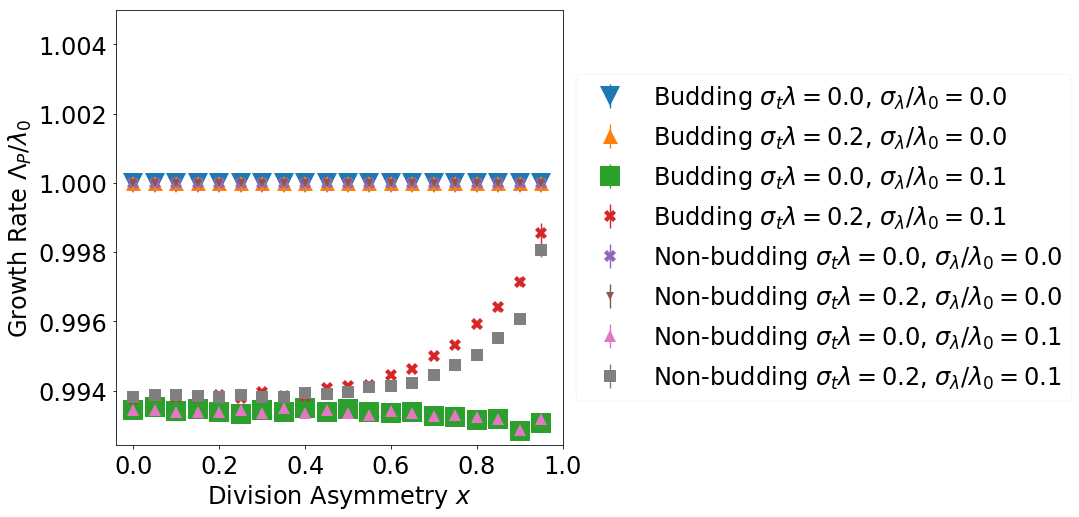

In [15]:
fig=plt.figure(figsize=[8,8])
ax=plt.subplot(1,1,1)
# sns.set(font_scale=1.5)
plt.style.use('seaborn-paper')
i0=0
i1=1
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
inds=[0,2,0,2]
inds1=[0,0,1,1]
lws = [8.0,8.0,8.0,8.0]
style=['-','--','-.',':']
markers=['v','^','s','X']
sizes=[20,15,20,12]
for temp in range(len(inds)):
    ind=inds[temp]
    ind1=inds1[temp]
    yv=np.mean(data[ind,ind1,ind_beta_start:,5,:,2,3],axis=1)
    ystd=np.std(data[ind,ind1,ind_beta_start:,5,:,2,3],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'Budding $ \sigma_t\lambda={0}$, $\sigma_\lambda/\lambda_0={1}$'.format(td_std[ind], lambda_std[ind1]),linestyle='None',marker=markers[temp],markersize=sizes[temp],capsize=7)
markers=['X','v','^','s']
sizes=[12,8,12,12]
for temp in range(len(inds)):
    ind=inds[temp]
    ind1=inds1[temp]
    yv=np.mean(data2[ind,ind1,ind_beta_start:,5,:,2,3],axis=1)
    ystd=np.std(data2[ind,ind1,ind_beta_start:,5,:,2,3],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'Non-budding $ \sigma_t\lambda={0}$, $\sigma_\lambda/\lambda_0={1}$'.format(td_std[ind], lambda_std[ind1]),linestyle='None',marker=markers[temp],markersize=sizes[temp],capsize=7)

#     plt.fill_between(xv,yv-ystd/np.sqrt(num_rep),yv+ystd/np.sqrt(num_rep),alpha=0.3)
plt.gca().set_prop_cycle(None)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=-0.04,xmax=1.0)
plt.ylim(ymax=1.005)
plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(24)
plt.legend(loc=[1.03,0.1],prop={'size': 24})
# plt.legend(loc=0)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/budding_figS2a_comp.eps',dpi=300,bbox_inches='tight')

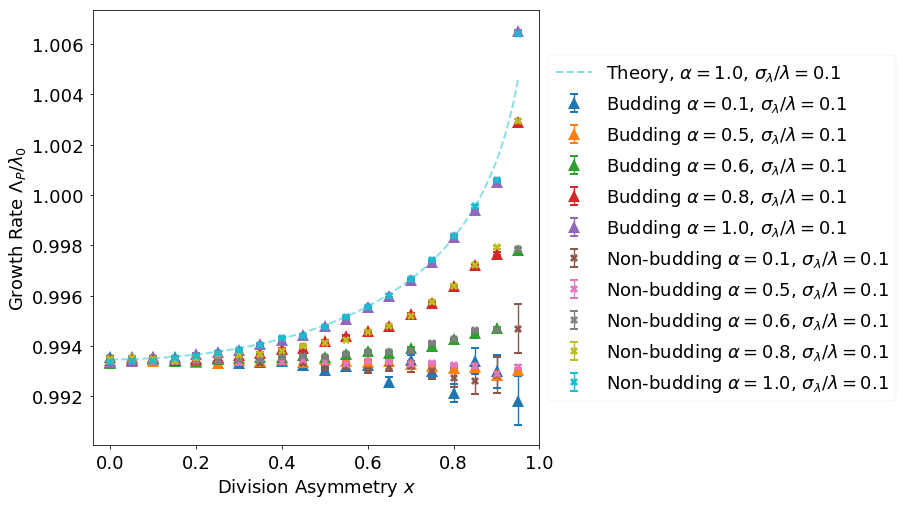

In [19]:
fig=plt.figure(figsize=[8,8])
ax=plt.subplot(1,1,1)
# sns.set(font_scale=2)
i0=0
i1=1
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
# for ind in range(0,11,2):
for ind in [1,5,6,8,10]:
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    p=plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'Budding $ \alpha={0}$, $\sigma_\lambda/\lambda={1}$'.format(alpha[ind],lambda_std[ind1]),linestyle='None',marker='^',markersize=12,capsize=4,capthick=2)
    
for ind in [1,5,6,8,10]:
    yv=np.mean(data2[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    ystd=np.std(data2[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    p=plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'Non-budding $ \alpha={0}$, $\sigma_\lambda/\lambda={1}$'.format(alpha[ind],lambda_std[ind1]),linestyle='None',marker='X',markersize=8,capsize=4,capthick=2)
xv=np.linspace(x[ind_beta_start],x[-1],100)
yv=jiseon_model_2(1.0,0.5*(1-xv),lambda_std[i1],1.0)
plt.plot(xv,yv,label=r'Theory, $\alpha={0}$, $\sigma_\lambda/\lambda={1}$'.format(alpha[ind],lambda_std[ind1]),linestyle='--',lw=2,color=p[0].get_color(),alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=-0.04,xmax=1.0)
plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(loc=[1.02,0.1],prop={'size': 18})
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
# plt.legend()
ax.yaxis.set_major_formatter(y_formatter)
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/budding_fig_2b_budding_comparison.eps',dpi=300,bbox_inches='tight')

In [13]:
# fig=plt.figure(figsize=[8,8])
# ax=plt.subplot(1,1,1)
# # sns.set(font_scale=2)
# plt.style.use('seaborn-paper')
# i0=0
# i1=1
# ind_beta_start=0
# xv=x[ind_beta_start:]
# # sns.set(font_scale=1.5)
# inds=[2,0,2,2,0,2]
# inds1=[0,2,2,0,2,2]
# inds2=[10,10,10,5,5,5]
# # lws = [8.0,8.0,8.0,8.0]
# style=['-','--','-.',':']
# markers=['v','^','s','X','o','<','>',',']
# sizes=[10,8,5,5,10,8,5,5]
# for temp in range(len(inds)):
#     ind=inds[temp]
#     ind1=inds1[temp]
#     ind2=inds2[temp]
#     yv=np.mean(data[ind,ind1,ind_beta_start:,ind2,:,2,3],axis=1)
#     ystd=np.std(data[ind,ind1,ind_beta_start:,ind2,:,2,3],axis=1)
#     plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'Sims $\sigma_t\lambda={0}$, $\sigma_\lambda/\lambda_0={1}$, $\alpha={2}$'.format(td_std[ind], lambda_std[ind1],alpha[ind2]),linestyle='None',marker=markers[temp],markersize=sizes[temp],capsize=7)
# #     plt.fill_between(xv,yv-ystd/np.sqrt(num_rep),yv+ystd/np.sqrt(num_rep),alpha=0.3)
# plt.gca().set_prop_cycle(None)
# xv=np.linspace(xv[0],xv[-1],100)
# lws=[8,7,6,5,4,3,2,1]
# for temp in range(len(inds)):
#     ind=inds[temp]
#     ind1=inds1[temp]
#     ind2=inds2[temp]
#     plt.plot(xv,jiseon_model_3(l,0.5-0.5*xv,lambda_std[ind1],alpha[ind2],td_std[ind]),label=r'Theory $\sigma_t\lambda={0}$, $\sigma_\lambda/\lambda_0={1}$, $\alpha={2}$'.format(td_std[ind], lambda_std[ind1],alpha[ind2]),linestyle='--',alpha=0.5,linewidth=lws[temp])
# plt.xlabel(r'Division Asymmetry $x$')
# plt.xlim(xmin=0)
# plt.ylim(ymax=1.005)
# plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
# for item in ([ax.xaxis.label, ax.yaxis.label] +
#               ax.get_xticklabels() + ax.get_yticklabels()):
#     item.set_fontsize(18)
# plt.legend(loc=[1.05,0.1],prop={'size': 18})
# # plt.legend(loc=0)
# y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
# ax.yaxis.set_major_formatter(y_formatter)
# fig.savefig('/mnt/c/Users/felix/Dropbox/19_growth_rate_paper/Figures/jiseon_model_test_var_t_std.png',dpi=300,bbox_inches='tight')

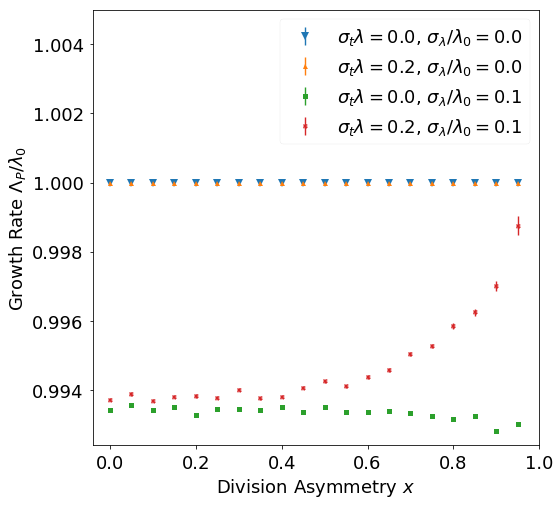

In [31]:
fig=plt.figure(figsize=[8,8])
ax=plt.subplot(1,1,1)
# sns.set(font_scale=2)
plt.style.use('seaborn-paper')
i0=0
i1=1
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
inds=[0,2,0,2]
inds1=[0,0,1,1]
lws = [8.0,8.0,8.0,8.0]
style=['-','--','-.',':']
markers=['v','^','s','X']
sizes=[8,5,5,5]
for temp in range(len(inds)):
    ind=inds[temp]
    ind1=inds1[temp]
    yv=np.mean(data[ind,ind1,ind_beta_start:,5,:,2,3],axis=1)
    ystd=np.std(data[ind,ind1,ind_beta_start:,5,:,2,3],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_t\lambda={0}$, $\sigma_\lambda/\lambda_0={1}$'.format(td_std[ind], lambda_std[ind1]),linestyle='None',marker=markers[temp],markersize=sizes[temp],capsize=7)
#     plt.fill_between(xv,yv-ystd/np.sqrt(num_rep),yv+ystd/np.sqrt(num_rep),alpha=0.3)
plt.gca().set_prop_cycle(None)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=-0.04,xmax=1.0)
plt.ylim(ymax=1.005)
plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(loc=0,prop={'size': 18})
# plt.legend(loc=0)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/budding_fig2a.eps',dpi=300,bbox_inches='tight')

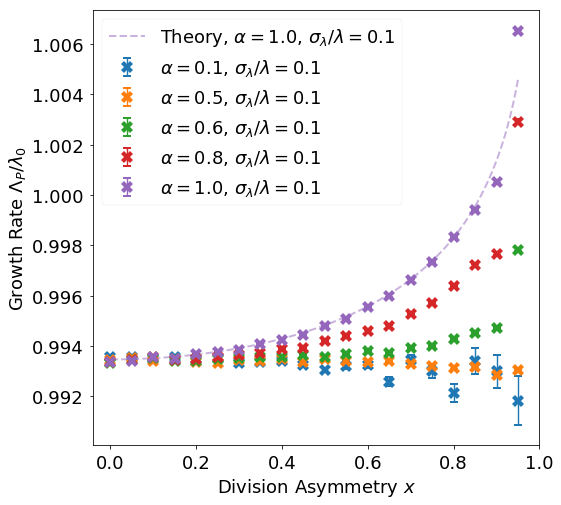

In [21]:
fig=plt.figure(figsize=[8,8])
ax=plt.subplot(1,1,1)
# sns.set(font_scale=2)
i0=0
i1=1
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
# for ind in range(0,11,2):
for ind in [1,5,6,8,10]:
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    p=plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \alpha={0}$, $\sigma_\lambda/\lambda={1}$'.format(alpha[ind],lambda_std[ind1]),linestyle='None',marker='X',markersize=12,capsize=4,capthick=2)
xv=np.linspace(x[ind_beta_start],x[-1],100)
yv=jiseon_model_2(1.0,0.5*(1-xv),lambda_std[i1],1.0)
plt.plot(xv,yv,label=r'Theory, $\alpha={0}$, $\sigma_\lambda/\lambda={1}$'.format(alpha[ind],lambda_std[ind1]),linestyle='--',lw=2,color=p[0].get_color(),alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=-0.04,xmax=1.0)
plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
# plt.legend()
ax.yaxis.set_major_formatter(y_formatter)
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/budding_fig_2b.eps',dpi=300,bbox_inches='tight')

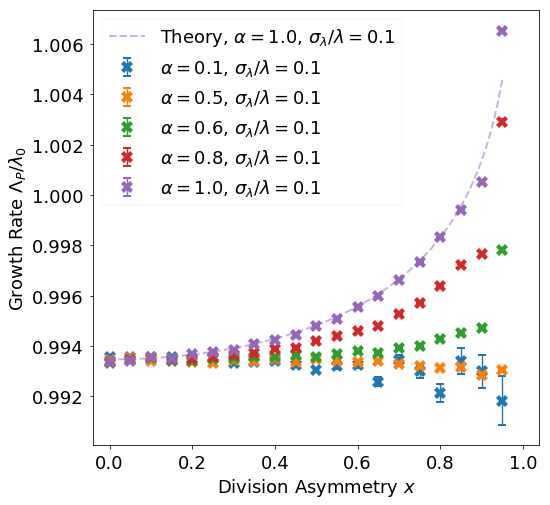

In [22]:
fig=plt.figure(figsize=[8,8])
ax=plt.subplot(1,1,1)
# sns.set(font_scale=2)
i0=0
i1=1
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
# for ind in range(0,11,2):
for ind in [1,5,6,8,10]:
    yv=np.mean(data[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    ystd=np.std(data[i0,i1,ind_beta_start:,ind,:,2,3],axis=1)
    p=plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \alpha={0}$, $\sigma_\lambda/\lambda={1}$'.format(alpha[ind],lambda_std[ind1]),linestyle='None',marker='X',markersize=12,capsize=4,capthick=2)
xv=np.linspace(x[ind_beta_start],x[-1],100)
yv=jiseon_model_2(1.0,0.5*(1-xv),lambda_std[i1],1.0)
plt.plot(xv,yv,label=r'Theory, $\alpha={0}$, $\sigma_\lambda/\lambda={1}$'.format(alpha[ind],lambda_std[ind1]),linestyle='--',lw=2,color=p[0].get_color(),alpha=0.5)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=-0.04,xmax=1.04)
plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(prop={'size': 18})
# plt.title(r'$\sigma_\lambda={0}$, $\sigma_t={1}$'.format(lambda_std[i1],td_std[i0]))
# plt.legend()
ax.yaxis.set_major_formatter(y_formatter)
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/Fig_1c_full_range_budding.eps',dpi=300,bbox_inches='tight')

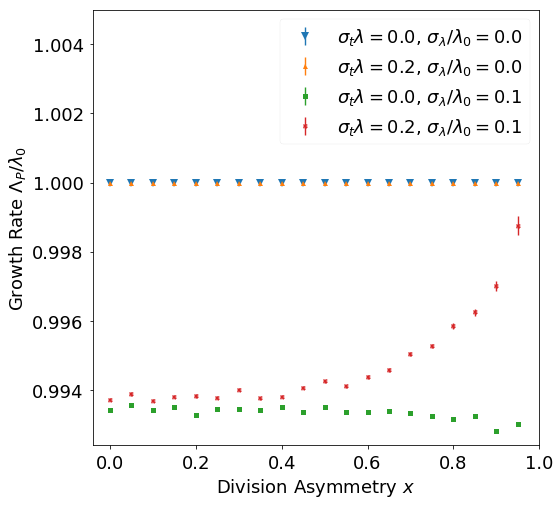

In [34]:
fig=plt.figure(figsize=[8,8])
ax=plt.subplot(1,1,1)
# sns.set(font_scale=2)
plt.style.use('seaborn-paper')
i0=0
i1=1
ind_beta_start=0
xv=x[ind_beta_start:]
# sns.set(font_scale=1.5)
inds=[0,2,0,2]
inds1=[0,0,1,1]
lws = [8.0,8.0,8.0,8.0]
style=['-','--','-.',':']
markers=['v','^','s','X']
sizes=[8,5,5,5]
for temp in range(len(inds)):
    ind=inds[temp]
    ind1=inds1[temp]
    yv=np.mean(data[ind,ind1,ind_beta_start:,5,:,2,3],axis=1)
    ystd=np.std(data[ind,ind1,ind_beta_start:,5,:,2,3],axis=1)
    plt.errorbar(xv,yv,yerr=ystd/np.sqrt(num_rep),label=r'$ \sigma_t\lambda={0}$, $\sigma_\lambda/\lambda_0={1}$'.format(td_std[ind], lambda_std[ind1]),linestyle='None',marker=markers[temp],markersize=sizes[temp],capsize=7)
#     plt.fill_between(xv,yv-ystd/np.sqrt(num_rep),yv+ystd/np.sqrt(num_rep),alpha=0.3)
plt.gca().set_prop_cycle(None)
plt.xlabel(r'Division Asymmetry $x$')
plt.xlim(xmin=-0.04,xmax=1.0)
plt.ylim(ymax=1.005)
plt.ylabel(r'Growth Rate $\Lambda_P/\lambda_0$')
for item in ([ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)
plt.legend(loc=0,prop={'size': 18})
# plt.legend(loc=0)
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
fig.savefig('/mnt/d/Dropbox/19_growth_rate_paper/Figures/Fig_S1a_budding.eps',dpi=300,bbox_inches='tight')

In [26]:
np.mean(data[0,1,3,5,:,2,3],axis=0)

0.9931631721679385

In [27]:
jiseon_model_2(1.0, beta[3], lambda_std[1], alpha[5])

0.9943057634233812